## 図3.2のコード

matlabの行列の演算 `\ (mldivide)` の説明を見ると、以下が書いていて、50行31列の行列 $\Phi$ に関しても最小二乗解がちゃんと返ってくるようになっている。


> - A が n 行 n 列の正方行列、B が n 行の行列である場合、x = A\B は存在する場合は A*x = B の方程式の解となります
> - A が m ~= n である m 行 n 列の方形行列で、B が m 行の行列の場合、A\B は A*x= B の方程式の最小二乗解を返します。


Pythonだと、関係する関数として<br>
`np.linalg.solve`: 正確な解がある時のみ(Aの逆行列が存在する時のみ)<br>
`np.linalg.lstsq`: 最小二乗解を返す<br>
`np.linalg.pinv` : 一般逆行列を返す<br>
があり、今回はテキストに沿って`np.linalg.lstsq`を使用する。

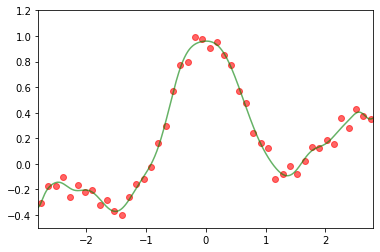

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n, N = 50, 1000
x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)
pix = np.pi * x
y = (np.sin(pix) / pix ) + 0.1*x + 0.05*np.random.randn(n)

p = np.ones((n,31))
P = np.ones((N,31))

for j in range(15):
    p[:, 2*j+1] = np.sin((j+1)/2*x)
    p[:, 2*j+2] = np.cos((j+1)/2*x)
    P[:, 2*j+1] = np.sin((j+1)/2*X)
    P[:, 2*j+2] = np.cos((j+1)/2*X)

t = np.linalg.lstsq(p, y, rcond=None)[0]
F = np.dot(P, t)

plt.scatter(x, y, c='r', alpha=0.6)
plt.plot(X, F, 'g-', alpha=0.6)
plt.xlim(-2.8, 2.8)
plt.ylim(-0.5, 1.2);

Matlab
- https://jp.mathworks.com/help/matlab/matlab_prog/array-vs-matrix-operations.html

一般逆行列についての参考資料
- http://www.sci.utah.edu/~gerig/CS6640-F2012/Materials/pseudoinverse-cis61009sl10.pdf